In [1]:
import json
import pandas as pd
import numpy as np
from __future__ import division

%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import division
from pylab import rcParams
from lib import *

import seaborn as sns
rcParams['figure.figsize'] = (15.0, 10.0)
import itertools

from haversine import haversine
import time

cm = plt.cm.get_cmap('jet')

from sklearn.cluster import MiniBatchKMeans

# import plotly
# import plotly.plotly as py

# import plotly.graph_objs as go


# plotly.offline.init_notebook_mode() # run at the start of every notebook

In [2]:
df = import_submission("sub_124845")

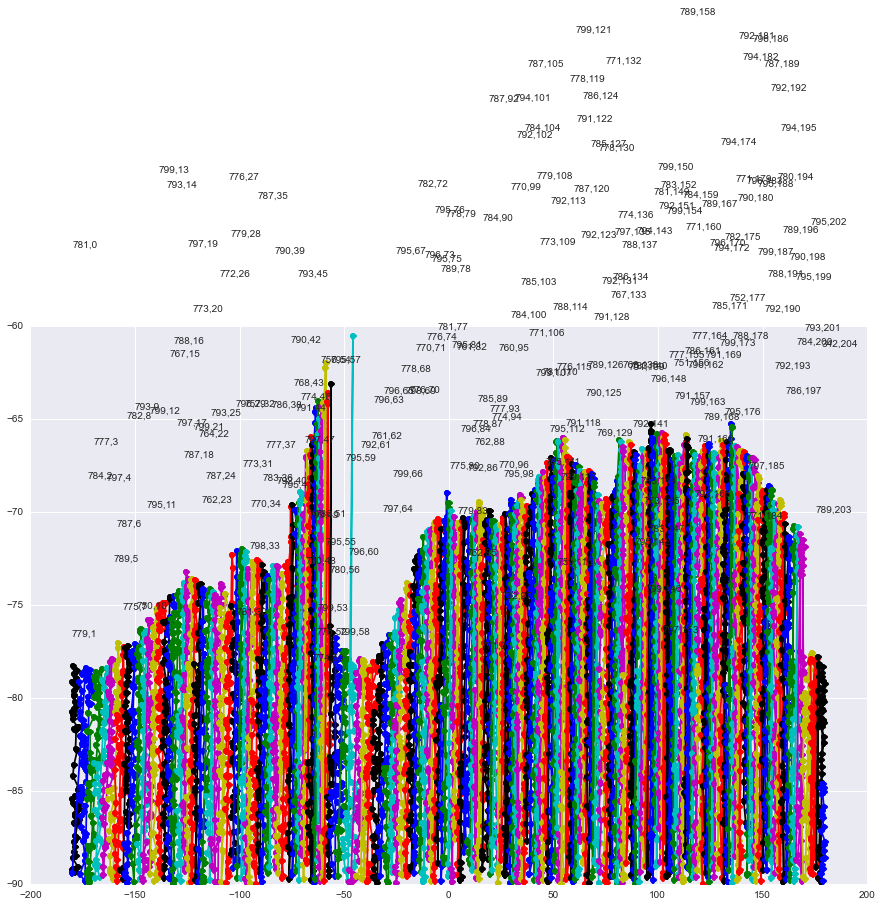

In [7]:
df_low = df[df.Latitude<-57]
df_low.TripId = optimize(df_low.Weight.values,800)
plot_trips(df_low,range(3000));

In [11]:
master_key = df_low.groupby("TripId").agg({"Longitude":np.median,"Weight":np.sum}).reset_index()

# optimize next section

# compare longitude of optimized section with lon of next lower section

# if lon of lower is left of midpoint: redo upper optimize with lower first, continue

# elif lon is higher: place optimized section, continue
    

In [ ]:
mask = np.logical_and(df.Longitude.between(25,40),df.Latitude.between(-57,1000))
dfm = df[mask]
del dfm["TripId"]
N = len(dfm)


In [ ]:
dfm["TripId"] = optimize(dfm.Weight.values,1000)
dfm = dfm[dfm.TripId.isin([0,1,2,3])]

In [ ]:
k=3
dfm,score = combo_optimizer(dfm,range(k+1))
dfm,score = combo_optimizer(dfm,range(k+1))
dfm,score = combo_optimizer(dfm,range(k+1))
plot_trips(dfm,range(10))

In [ ]:
df = import_submission("sub_124845")

lon_low = -160
lon_high = -140
lon_diff = lon_high-lon_low
df_test = df[df.Longitude.between(lon_low,lon_high)]

df_test = df_test[["GiftId","x","y","z","Weight","TripId"]].merge(gifts[["GiftId","Latitude","Longitude"]],on="GiftId")


df_test["TripId"] = np.nan
df_test_h = df_test[df_test.Latitude>-57]
df_test_l = df_test[df_test.Latitude<-57]
plot_trips(df_test_l,range(3000))

tu = df_test_h.Weight.sum()
tl = df_test_l.Weight.sum()
tu,tl

y_ran = np.arange(lon_diff*.5,lon_diff*1.1).astype(int)
out = []
# y_ran=[1]
for y in y_ran:
#     y = 12

    target_chunk_weight = 1000.5
    ylw_per_chunk = tl/y
    yuw_per_chunk = target_chunk_weight-ylw_per_chunk-10.5

    x = np.ceil((tu-yuw_per_chunk*y)/target_chunk_weight)
    xw_per_chunk = (tu-yuw_per_chunk*y)/x
    sp = x/y

    low_trips = np.round(np.linspace(sp/2,(x+y)-sp/2,y))-1

    ylw_per_chunk = ylw_per_chunk+10
    
    
    if ylw_per_chunk>target_chunk_weight:
        out.append(np.nan)
        continue


    gifts_xyz = df_test_h.sort_values("Longitude")
    gifts_xyz["TripId"]  = optimize(gifts_xyz.Weight.values,xw_per_chunk)
    gifts_xyz2 = df_test_l.sort_values("Longitude")
    gifts_xyz2["TripId"]  = optimize(gifts_xyz2.Weight.values,ylw_per_chunk)
    gifts_xyz3 = gifts_xyz2.sort_values("Longitude")
    for i,k in enumerate(low_trips):
        gifts_xyz["TripId"][gifts_xyz.TripId>=k]  = optimize(gifts_xyz[gifts_xyz.TripId>=k].Weight.values, yuw_per_chunk)+k
        gifts_xyz["TripId"][gifts_xyz.TripId>=k+1]  = optimize(gifts_xyz[gifts_xyz.TripId>=k+1].Weight.values, xw_per_chunk)+k+1
        gifts_xyz3["TripId"][gifts_xyz2.TripId==i] = k

    dfs = pd.concat([gifts_xyz3,gifts_xyz]).sort_values(["TripId","Latitude"],ascending=[0,0])
    low_trips,x,ylw_per_chunk,yuw_per_chunk,xw_per_chunk,low_trips,sp,(tu-yuw_per_chunk)/target_chunk_weight
    dfs = sort_trips(dfs)
#     df = dfs[["GiftId","x","y","z","Weight","TripId"]].merge(gifts[["GiftId","Latitude","Longitude"]],on="GiftId")
    plot_trips(df,range(3000))
    plt.show()
    print y,quick_total_score(dfs)
    out.append(quick_total_score(dfs))
out

In [ ]:
k=12
dfs_o,score = combo_optimizer(dfs,range(k+1))
# dfm,score = combo_optimizer(dfm,range(k+1))
# dfm,score = combo_optimizer(dfm,range(k+1))
plot_trips(dfs_o,range(k+1))

In [ ]:

plot_trips(dfs_o,range(k+1))

In [ ]:

df_test = df[df.Longitude.between(25,26)].sort_values("Longitude")
df_test["TripId"] = optimize(df_test.Weight.values,1000)
# df_test = df_test.sort_values(["TripId","Latitude"])
print quick_total_score(df_test)
df_test = sort_trips(df_test)
print quick_total_score(df_test)
_=plot_trips(df_test,range(30))

In [ ]:
k=12
df_test_o,score = combo_optimizer(df_test,range(k+1))
# dfm,score = combo_optimizer(dfm,range(k+1))
# dfm,score = combo_optimizer(dfm,range(k+1))
plot_trips(df_test_o,range(k+1))

In [ ]:
df